In [1]:
import numpy as np
import pandas as pd
import importlib as imp
from IPython.display import display

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import rcParams

import titanic_util as tu
tu = imp.reload(tu)

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [3]:
titanic_data = tu.load(opt='train')

attaching_keys=['Sex','Age','Fare','Embarked','Pclass','SibSp','Parch',np.array(['Parch','SibSp'])]

new_data, data_targets = tu.mung(titanic_data, attaching_keys, base_truth='Survived')

display(titanic_data.head())
display(new_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Sex,Age,Fare,C,Q,S,1,2,3,SibSp,Parch,FamSize
0,-0.737695,-0.592481,-0.502445,-0.482043,-0.307562,0.619306,-0.565685,-0.510152,0.902587,0.432793,-0.473674,0.059160
1,1.355574,0.638789,0.786845,2.074505,-0.307562,-1.614710,1.767767,-0.510152,-1.107926,0.432793,-0.473674,0.059160
2,1.355574,-0.284663,-0.488854,-0.482043,-0.307562,0.619306,-0.565685,-0.510152,0.902587,-0.474545,-0.473674,-0.560975
3,1.355574,0.407926,0.420730,-0.482043,-0.307562,0.619306,1.767767,-0.510152,-1.107926,0.432793,-0.473674,0.059160
4,-0.737695,0.407926,-0.486337,-0.482043,-0.307562,0.619306,-0.565685,-0.510152,0.902587,-0.474545,-0.473674,-0.560975


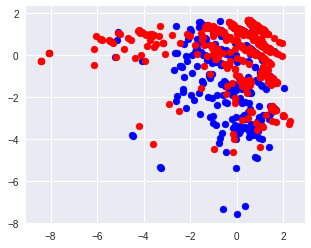

In [4]:
pca_vis = tu.PCA(task_type='reduce_dim', pc_count=2)
reduced_data = pca_vis.fit(new_data)

reduced_data = DataFrame(reduced_data); reduced_data.index = new_data.index

# display(reduced_data)
# print(reduced_data.shape)

who_lives = reduced_data.loc[data_targets==1]
who_dies = reduced_data.loc[data_targets==0]

# display(who_lives); display(who_dies)

plt.scatter(who_lives.iloc[:,0], who_lives.iloc[:,1], color='b')
plt.scatter(who_dies.iloc[:,0], who_dies.iloc[:,1], color='r')
plt.show()

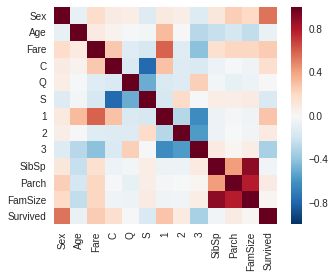

In [5]:
corr = new_data.join(titanic_data['Survived']).corr()

display(sb.heatmap(corr))

In [6]:
log_reg = tu.LogisticRegressor(max_it=2000, lambd=0.3, alpha=0.01)

log_reg.fit(new_data, data_targets, portion_train=0.7)

print('Training accuracy was {}'.format(100 - log_reg.train_error))
print('Cross-validation accuracy was {}'.format(100 - log_reg.cv_error))
print('Optimal weights are: \n{}'.format(log_reg.weights))

Training accuracy was 78.81219903691814
Cross-validation accuracy was 77.23880597014926
Optimal weights are: 
0     1.219410
1    -0.425982
2     0.209025
3     0.048306
4     0.044887
5    -0.088053
6     0.427954
7     0.077829
8    -0.432069
9    -0.203685
10    0.053328
11   -0.112570
dtype: float64


In [7]:
testing_data = tu.load('test')

testing_data = tu.mung(testing_data, attaching_keys)

# display(testing_data)

pred = log_reg.predict(testing_data)

display(pred)

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
5      0.0
6      1.0
7      0.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     1.0
15     1.0
16     0.0
17     0.0
18     1.0
19     1.0
20     0.0
21     0.0
22     1.0
23     1.0
24     1.0
25     0.0
26     1.0
27     0.0
28     0.0
29     0.0
      ... 
388    0.0
389    0.0
390    1.0
391    1.0
392    0.0
393    0.0
394    0.0
395    1.0
396    0.0
397    1.0
398    0.0
399    0.0
400    1.0
401    0.0
402    1.0
403    1.0
404    0.0
405    1.0
406    0.0
407    1.0
408    1.0
409    1.0
410    1.0
411    1.0
412    1.0
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Length: 418, dtype: float64